# Chapter 14: GraphX

![img](graphx_logo.png)

![graph_comp](GraphX_comp.png)

- GraphX là một thành phần mới trong Spark dành cho đồ thị và tính toán song song đồ thị. 
- GraphX mở rộng Spark RDD bằng cách giới thiệu một bản tóm tắt Graph mới: một multigraph có hướng với các thuộc tính được gắn vào mỗi vertex và edge. 
- Để hỗ trợ tính toán biểu đồ, GraphX cung cấp một tập hợp các toán tử cơ bản (ví dụ như: subgraph, joinVertices, và aggregateMessages...)
- Ngoài ra, GraphX bao gồm một bộ sưu tập các thuật toán và trình xây dựng để đơn giản hóa các tác vụ phân tích biểu đồ.

## Graph Theory - Lý thuyết đồ thị
- Lý thuyết đồ thị là một nghiên cứu toàn diện và tiện dụng trong đó thảo luận về các cấu trúc đa dạng của đồ thị. 
- Mỗi đồ thị bao gồm các đỉnh (vertices hoặc node) được kết nối bởi các cạnh (edges). Thông thường các điểm dữ liệu (data points) hình thành các nút  (nodes) và bất kỳ kết nối hoặc mối quan hệ giữa các nút tạo nên các cạnh. 
- Một ví dụ điển hình của đồ thị là một tập hợp người dùng (node) trên Twitter được kết nối với nhau thông qua mối quan hệ "theo dõi“ ("following“) hoặc "người theo dõi“ ("follower" ). Mỗi node và edge có thể nhận được các thuộc tính phân loại và số (categorical and numerical attributes). 
- Sử dụng lý thuyết đồ thị, chúng ta có thể xác định các cấu trúc tiện dụng như phát hiện các cộng đồng, tìm các node được kết nối mạnh mẽ, tìm các node có ảnh hưởng nhất và nhiều cấu trúc khác. 

In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
import os

In [3]:
from pyspark.sql import *

In [4]:
# Cài đặt và thiết lập biến môi trường

In [5]:
SUBMIT_ARGS = "--packages graphframes:graphframes:0.7.0-spark2.4-s_2.11 pyspark-shell"
os.environ["PYSPARK_SUBMIT_ARGS"] = SUBMIT_ARGS

In [6]:
conf = pyspark.SparkConf()
sc = pyspark.SparkContext(conf=conf)
print(sc._conf.getAll())

[('spark.repl.local.jars', 'file:///C:/Users/hv/.ivy2/jars/graphframes_graphframes-0.7.0-spark2.4-s_2.11.jar,file:///C:/Users/hv/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'), ('spark.executor.id', 'driver'), ('spark.app.name', 'pyspark-shell'), ('spark.driver.host', 'PM503-GV'), ('spark.driver.port', '50469'), ('spark.submit.pyFiles', 'C:/Users/hv/.ivy2/jars/graphframes_graphframes-0.7.0-spark2.4-s_2.11.jar,C:/Users/hv/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'), ('spark.rdd.compress', 'True'), ('spark.app.id', 'local-1603587027550'), ('spark.serializer.objectStreamReset', '100'), ('spark.master', 'local[*]'), ('spark.files', 'file:///C:/Users/hv/.ivy2/jars/graphframes_graphframes-0.7.0-spark2.4-s_2.11.jar,file:///C:/Users/hv/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'), ('spark.submit.deployMode', 'client'), ('spark.jars', 'file:///C:/Users/hv/.ivy2/jars/graphframes_graphframes-0.7.0-spark2.4-s_2.11.jar,file:///C:/Users/hv/.ivy2/jars/org.slf4j_slf4j-api-1.7.16.jar'), ('spark.ui.showCons

### Tạo graph

In [7]:
from graphframes import *

In [8]:
spark = SparkSession(sc)

In [9]:
vertices = spark.createDataFrame([('1', 'Carter', 50), 
                                  ('2', 'May', 26),
                                 ('3', 'Mills', 80),
                                  ('4', 'Hood', 65),
                                  ('5', 'Banks', 93),
                                 ('98', 'Berg', 28),
                                 ('99', 'Page', 16)],
                                 ['id', 'name', 'age'])
edges = spark.createDataFrame([('1', '2', 'friend'),
                               ('1', '98', 'friend'), 
                               ('2', '1', 'friend'),
                              ('3', '1', 'friend'),
                              ('1', '3', 'friend'),
                               ('2', '3', 'follows'),
                               ('3', '4', 'friend'),
                               ('4', '3', 'friend'),
                               ('5', '3', 'friend'),
                               ('3', '5', 'friend'),
                               ('4', '5', 'follows'),
                              ('98', '99', 'friend'),
                              ('99', '98', 'friend')],
                              ['src', 'dst', 'type'])

In [10]:
g = GraphFrame(vertices, edges)

In [11]:
## Take a look at the DataFrames
g.vertices.show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1|Carter| 50|
|  2|   May| 26|
|  3| Mills| 80|
|  4|  Hood| 65|
|  5| Banks| 93|
| 98|  Berg| 28|
| 99|  Page| 16|
+---+------+---+



In [12]:
g.edges.show()

+---+---+-------+
|src|dst|   type|
+---+---+-------+
|  1|  2| friend|
|  1| 98| friend|
|  2|  1| friend|
|  3|  1| friend|
|  1|  3| friend|
|  2|  3|follows|
|  3|  4| friend|
|  4|  3| friend|
|  5|  3| friend|
|  3|  5| friend|
|  4|  5|follows|
| 98| 99| friend|
| 99| 98| friend|
+---+---+-------+



In [13]:
## Check the number of edges of each vertex
g.degrees.show()

+---+------+
| id|degree|
+---+------+
|  3|     7|
| 98|     3|
| 99|     2|
|  5|     3|
|  1|     5|
|  4|     3|
|  2|     3|
+---+------+



In [14]:
import networkx as nx

In [15]:
import matplotlib.pyplot as plt

In [16]:
def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'],row['dst'])        
    plt.subplot(121)
    nx.draw(Gplot, with_labels=True, font_weight='bold')

c:\program files\python36\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


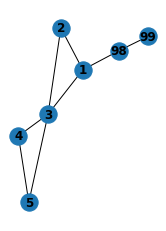

In [17]:
PlotGraph(g.edges)

### Filtering

In [18]:
type(g)

graphframes.graphframe.GraphFrame

In [19]:
g.vertices.filter("age > 30").show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1|Carter| 50|
|  3| Mills| 80|
|  4|  Hood| 65|
|  5| Banks| 93|
+---+------+---+



In [20]:
g.inDegrees.filter("inDegree >= 2")\
                    .sort("inDegree", ascending=False)\
                    .show()

+---+--------+
| id|inDegree|
+---+--------+
|  3|       4|
| 98|       2|
|  5|       2|
|  1|       2|
+---+--------+



In [21]:
g.edges.filter('type == "friend"').show()

+---+---+------+
|src|dst|  type|
+---+---+------+
|  1|  2|friend|
|  1| 98|friend|
|  2|  1|friend|
|  3|  1|friend|
|  1|  3|friend|
|  3|  4|friend|
|  4|  3|friend|
|  5|  3|friend|
|  3|  5|friend|
| 98| 99|friend|
| 99| 98|friend|
+---+---+------+



### Connecting

In [22]:
# GraphFrames requires you to set 
# a directory where it can save checkpoints
sc.setCheckpointDir('graphframes_cps')

In [23]:
g.connectedComponents().show()

+---+------+---+------------+
| id|  name|age|   component|
+---+------+---+------------+
|  1|Carter| 50|154618822656|
|  2|   May| 26|154618822656|
|  3| Mills| 80|154618822656|
|  4|  Hood| 65|154618822656|
|  5| Banks| 93|154618822656|
| 98|  Berg| 28|154618822656|
| 99|  Page| 16|154618822656|
+---+------+---+------------+



- Chỉ có một componenet trong đồ thị.

### Motif finding
- Khi tìm từng cặp vertice a,b được nối với nhau bằng edge e, và cặp  vertice b,c được nối với nhau bằng edge e2 => trả về DataFrame tất cả các cấu trúc như vậy trong có biểu đồ, với các cột cho từng thành phần được đặt tên (vertices hoặc edges) trong mô-đun của tất cả các cấu trúc như vậy trong biểu đồ:
- g.find("(a)-[e]->(b); (b)-[e2]->(a)").show()
- Nếu edges và/hoặc vertices không có tên (anonymous), chúng sẽ không được hiển thị trong DataFrame kết quả. Mô-đun có thể được nối bằng dấu chấm phẩy (;) và có thể được phủ định bằng dấu chấm than(!).

In [24]:
mutualFriends = g.find("(a)-[]->(b); (b)-[]->(c); (c)-[]->(b); (b)-[]->(a)")\
                                                                .dropDuplicates()

In [25]:
mutualFriends.filter('a.id == 2 and c.id == 3').show()

+------------+---------------+--------------+
|           a|              b|             c|
+------------+---------------+--------------+
|[2, May, 26]|[1, Carter, 50]|[3, Mills, 80]|
+------------+---------------+--------------+



### TriangleCount 

- Đếm số lượng hình tam giác đi qua mỗi đỉnh trong đồ thị. Một tam giác có thể được định nghĩa là một nhóm gồm ba đỉnh có liên quan với nhau. Ví dụ: Tam giác abc: a có cạnh với b, b có cạnh với c và c có cạnh với a.

In [26]:
g.triangleCount().show()

+-----+---+------+---+
|count| id|  name|age|
+-----+---+------+---+
|    2|  3| Mills| 80|
|    0| 98|  Berg| 28|
|    0| 99|  Page| 16|
|    1|  5| Banks| 93|
|    1|  1|Carter| 50|
|    1|  4|  Hood| 65|
|    1|  2|   May| 26|
+-----+---+------+---+



### PageRank
- PageRank hoạt động bằng cách đếm số lượng (number) và chất lượng (quality) của các liên kết (link) đến một trang để xác định ước tính sơ bộ về tầm quan trọng của trang web. Giả định là các trang web quan trọng hơn có khả năng nhận được nhiều link hơn từ các trang web khác.
- Thuật toán PageRank cho rằng một người lướt web đang click ngẫu nhiên vào các link cuối cùng sẽ dừng click. Xác suất, ở bất kỳ bước nào, người đó sẽ tiếp tục là một yếu tố giảm tốc độ click (damping factor). Có thể đặt hệ số damping factor bằng cách thay đổi tham số resetProbability. Các tham số quan trọng khác là độ dung sai(tolerance - tol) và số lần lặp tối đa (maxIter).
https://medium.com/@jentekllc8888/page-rank-with-apache-spark-graphx-a51964467c56


In [27]:
pr = g.pageRank(resetProbability=0.15, tol=0.01)

In [28]:
# look at the pagerank score for every vertex
pr.vertices.show()

+---+------+---+------------------+
| id|  name|age|          pagerank|
+---+------+---+------------------+
|  1|Carter| 50|0.6799541646597174|
|  3| Mills| 80| 1.360269120202177|
|  2|   May| 26|0.3505290564027432|
|  4|  Hood| 65|0.5442781769957595|
| 98|  Berg| 28| 1.693795983443179|
|  5| Banks| 93|0.7695218034237804|
| 99|  Page| 16|1.6016516948726431|
+---+------+---+------------------+



In [29]:
# look at the weight of every edge
pr.edges.show()

+---+---+-------+------------------+
|src|dst|   type|            weight|
+---+---+-------+------------------+
|  1|  2| friend|0.3333333333333333|
| 99| 98| friend|               1.0|
|  1|  3| friend|0.3333333333333333|
|  4|  5|follows|               0.5|
|  5|  3| friend|               1.0|
| 98| 99| friend|               1.0|
|  3|  5| friend|0.3333333333333333|
|  4|  3| friend|               0.5|
|  2|  1| friend|               0.5|
|  3|  4| friend|0.3333333333333333|
|  1| 98| friend|0.3333333333333333|
|  3|  1| friend|0.3333333333333333|
|  2|  3|follows|               0.5|
+---+---+-------+------------------+

